In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

#loading the data
X, y = fetch_california_housing(return_X_y=True)

#Download the Housing data
import urllib.request
data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'
def download_read_data(path):
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data
#load the real world data
cal_data = download_read_data(data_path)
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#This is where we are going to understand more about the data. But before we get there, let's split the data into training and testing sets
# This is because on the course of data analysis and processing, there can be data leakage
#As a side notes, training set is used during the model training, and testing set is used during the model evaluation.
from lightgbm import train
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(cal_data, test_size=0.1, random_state=20)
print('The size of training data is: {} \n The size of the testing data is: {}'.format(len(train_data),len(test_data)))

The size of training data is: 18576 
 The size of the testing data is: 2064


In [4]:
#As you can see, we have allocated 10 percent of the full data to the test set.
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()

In [5]:
#Checking data statistics
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576.0,NaN,NaN,NaN,-119.56753,2.000581,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,18576.0,NaN,NaN,NaN,35.630217,2.13326,32.54,33.93,34.26,37.71,41.95
housing_median_age,18576.0,NaN,NaN,NaN,28.661068,12.604039,1.0,18.0,29.0,37.0,52.0
total_rooms,18576.0,NaN,NaN,NaN,2631.567453,2169.46745,2.0,1445.0,2127.0,3149.0,39320.0
total_bedrooms,18390.0,NaN,NaN,NaN,537.344698,417.672864,1.0,295.0,435.0,648.0,6445.0
population,18576.0,NaN,NaN,NaN,1422.408376,1105.486111,3.0,785.75,1166.0,1725.0,28566.0
households,18576.0,NaN,NaN,NaN,499.277078,379.473497,1.0,279.0,410.0,606.0,6082.0
median_income,18576.0,NaN,NaN,NaN,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,NaN,NaN,NaN,206881.011305,115237.605962,14999.0,120000.0,179800.0,264700.0,500001.0
ocean_proximity,18576,5,<1H OCEAN,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Checking Missing Values
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#We only have missing values in the total_bedrooms feature.
print('The Percentage of missing values in total_bedrooms is: {}%'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The Percentage of missing values in total_bedrooms is: 1.0012919896640826%


In [8]:
#Checking Values in the Categorical Feature(s)
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [11]:
train_data['total_bedrooms'].value_counts()

280.0     47
331.0     45
343.0     44
284.0     44
393.0     44
          ..
2473.0     1
1785.0     1
2527.0     1
1989.0     1
1142.0     1
Name: total_bedrooms, Length: 1863, dtype: int64

<AxesSubplot:xlabel='total_bedrooms', ylabel='count'>

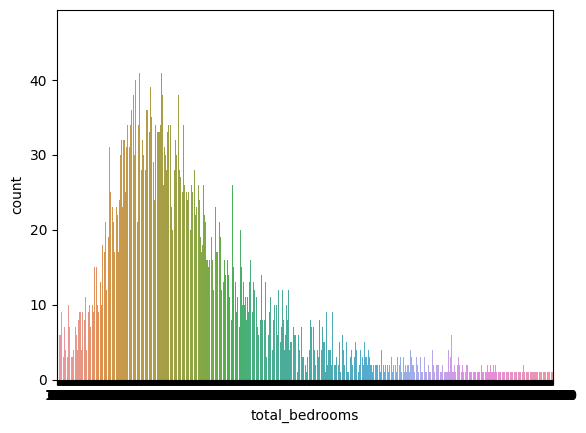

In [12]:
sns.countplot(data=train_data, x='total_bedrooms')

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

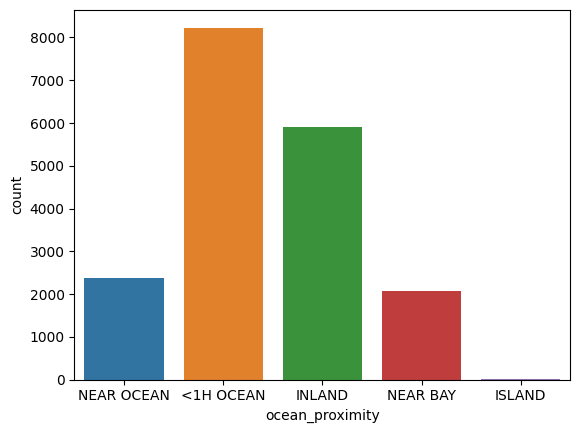

In [9]:
sns.countplot(data=train_data, x='ocean_proximity')

In [12]:
#Checking Correlation Between Features
correlation = train_data.corr()
correlation['median_house_value']

/tmp/ipykernel_5739/3096775740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

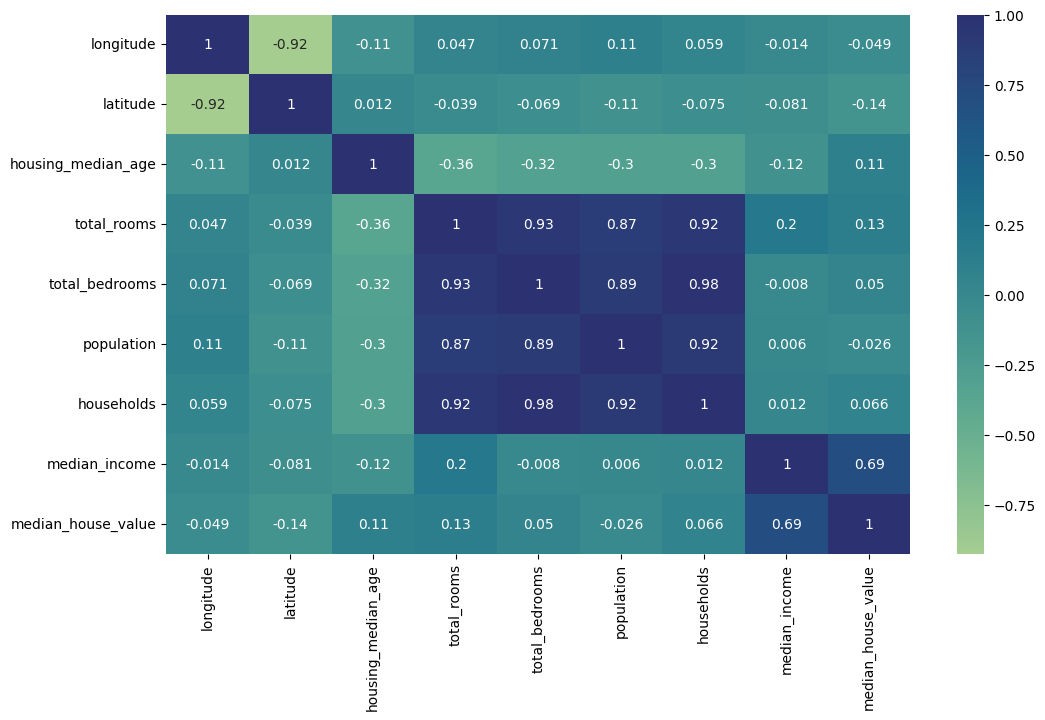

In [13]:
#Visualizing correlation
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True, cmap='crest')

In [ ]:
#Some features like total_bedrooms and households are highly correlated. Same things for total_bedrooms and total_rooms and that makes sense because for many houses, the number of people who stay in that particular house (households) goes with the number of available rooms(total_rooms) and bed_roomsSome features like total_bedrooms and households are highly correlated. Same things for total_bedrooms and total_rooms and that makes sense because for many houses, the number of people who stay in that particular house (households) goes with the number of available rooms(total_rooms) and bed_rooms
#The other interesting insights is that the price of the house is closely correlated with the median income, and that makes sense too